# 5.8
### 例子：通过测量恒星光谱上多余谱线的多普勒效应测定恒星的视向速度
### （已知均值求方差）

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


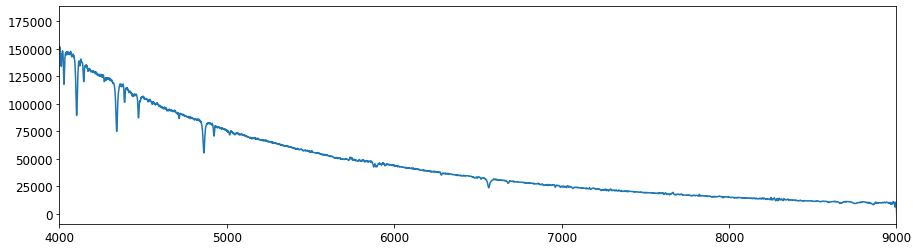

In [1]:
%matplotlib inline
#posteior distribution of binomial data
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits

def loadData(filename):
    '''
    Read fits data
    
    '''
    tchfits = fits.open(filename)   # 获得 HDU list
    tabl = tchfits[1].data          
    # 如果HDU的数据是图像，那么.data将会返回一个ndarray对象（numpy的n维数组）
    
    return tabl

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

# measure the redshift from an absorption line
filename = '351110104.fits'
tchfits = fits.open(filename)
log_wv0 = tchfits[0].header['CRVAL1']   # 波长起始点？
log_dwv = tchfits[0].header['CD1_1']    # 每一格对应波长？

sp = tchfits[0].data   # 谱线强度

N = len(sp[0,:])
wv = 10**(log_wv0+np.arange(0,N,1)*log_dwv)   # 波长

fig = plt.figure(figsize=[15,4])
ax = fig.add_subplot(111)
ax.plot(wv,sp[0,:])
ax.set_xlim([4000,9000])
fig.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


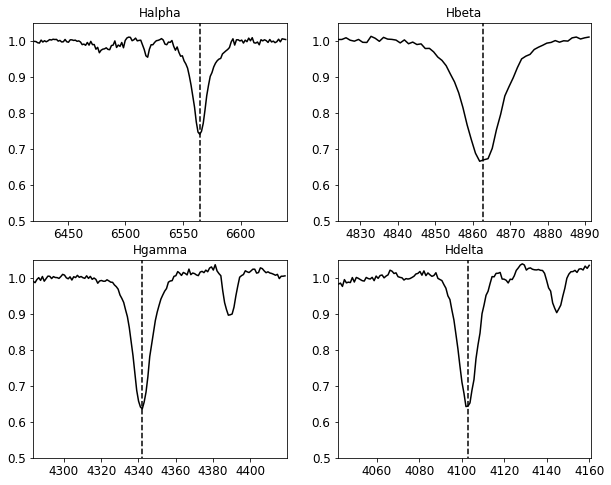

In [2]:
'''
画出四条线
'''

# H_alpha, H_beta, H_gamma, H_delta 四条线静止时的线心波长
Ha_0 = 6564.6
Hb_0 = 4862.71
Hg_0 = 4341.69
Hd_0 = 4102.89


Ha_cont = [6420.00,6455.00,6600.00,6640.00]
Hb_cont = [4823.875,4847.875,4876.625,4891.625]
Hg_cont = [4283.50,4319.75,4367.25,4419.75]
Hd_cont = [4041.60,4079.75,4128.50,4161.00]

def normSpec(wv,sp,cont):
    ind_cont1 = (wv>=cont[0]) & (wv<=cont[1])
    ind_cont2 = (wv>=cont[2]) & (wv<=cont[3])
    fc1 = np.mean(sp[ind_cont1])
    wv1 = np.mean(wv[ind_cont1])
    fc2 = np.mean(sp[ind_cont2])
    wv2 = np.mean(wv[ind_cont2])
    fc = (fc2-fc1)/(wv2-wv1)*(wv-wv1)+fc1
    normsp = sp/fc
    return normsp
'''
谱线归一化处理
参数：原谱的波长、谱线强度、取值区间（区间为关键参数）
过程：从谱线外部（背景）在谱线两侧取值，视作线性变化
      原谱线强度 / （粗略线性化的）背景强度
'''

def gauss(x,A,mu,sig):
    return 1.-A*np.exp(-(x-mu)**2/(2*sig**2))


#normalize Halpha
normsp_Ha = normSpec(wv,sp[0,:],Ha_cont)
ind_Ha = (wv>=Ha_cont[0]) & (wv<=Ha_cont[3])
normsp_Ha = normsp_Ha[ind_Ha]
wv_Ha = wv[ind_Ha]
#normalize Hbeta
normsp_Hb = normSpec(wv,sp[0,:],Hb_cont)
ind_Hb = (wv>=Hb_cont[0]) & (wv<=Hb_cont[3])
normsp_Hb = normsp_Hb[ind_Hb]
wv_Hb = wv[ind_Hb]
#normalize Hgamma
normsp_Hg = normSpec(wv,sp[0,:],Hg_cont)
ind_Hg = (wv>=Hg_cont[0]) & (wv<=Hg_cont[3])
normsp_Hg = normsp_Hg[ind_Hg]
wv_Hg = wv[ind_Hg]
#normalize Hdelta
normsp_Hd = normSpec(wv,sp[0,:],Hd_cont)
ind_Hd = (wv>=Hd_cont[0]) & (wv<=Hd_cont[3])
normsp_Hd = normsp_Hd[ind_Hd]
wv_Hd = wv[ind_Hd]


fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(221)
ax.plot(wv_Ha,normsp_Ha,'k-')
#y = gauss(wv_Ha,0.26,Ha_0,7.5)
#ax.plot(wv_Ha,y,'r--')
ax.plot([Ha_0,Ha_0],[0.,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Ha_cont[0],Ha_cont[3]])
ax.set_title('Halpha',fontsize=12)

ax = fig.add_subplot(222)
ax.plot(wv_Hb,normsp_Hb,'k-')
#y = gauss(wv_Hb,0.335,Hb_0,5.0)
#ax.plot(wv_Hb,y,'r--')
ax.plot([Hb_0,Hb_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hb_cont[0],Hb_cont[3]])
ax.set_title('Hbeta',fontsize=12)

ax = fig.add_subplot(223)
ax.plot(wv_Hg,normsp_Hg,'k-')
#y = gauss(wv_Hg,0.36,Hg_0,5.0)
#ax.plot(wv_Hg,y,'r--')
ax.plot([Hg_0,Hg_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hg_cont[0],Hg_cont[3]])
ax.set_title('Hgamma',fontsize=12)

ax = fig.add_subplot(224)
ax.plot(wv_Hd,normsp_Hd,'k-')
#y = gauss(wv_Hd,0.36,Hd_0,4.4)
#ax.plot(wv_Hd,y,'r--')
ax.plot([Hd_0,Hd_0],[0.0,1.1],'k--')
ax.set_ylim([0.5,1.05])
ax.set_xlim([Hd_cont[0],Hd_cont[3]])
ax.set_title('Hdelta',fontsize=12)

fig.show()

mean wavelength = 4862.540
std wavelength = 5.944
shift Delta lambda/lambda = -0.00003491
velocity = -10.474 km/s
std line width = 366.733 km/s

mean wavelength = 4862.531
std wavelength = 6.002
shift Delta lambda/lambda = -0.00003679
velocity = -11.038 km/s
std line width = 370.272 km/s

mean wavelength = 4862.483
std wavelength = 6.048
shift Delta lambda/lambda = -0.00004672
velocity = -14.016 km/s
std line width = 373.102 km/s


mean vel = -12.090+/-2.236


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


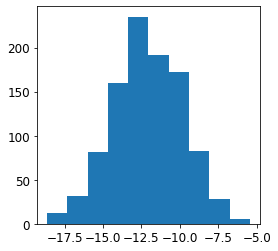

In [5]:
'''
对四条线分别进行随机抽样
'''

#random sampling for Hbeta

y = 1.-normsp_Hb[(wv_Hb>4840.)]   # 把谱线翻转到坐标线上方
                                  # 这里已经限定了波长的范围
x = wv_Hb[(wv_Hb>4840.)]
#y = 1.-normsp_Hb[(wv_Hb>4852.) & (wv_Hb<4872)]
#x = wv_Hb[((wv_Hb>4852.) & (wv_Hb<4872))]
N = 100000

M = 1000
vlos_mc_Hb = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)   # 内插法得到相应 x_s0 处的谱线强度
    ind_acc = (y_s0<=y_x)       # 拒绝抽样

    x_s = x_s0[ind_acc]

    if m<3:
        print( 'mean wavelength = %(m).3f' %\
            {'m': np.mean(x_s)})   # 取抽样的平均值作为线心
        print( 'std wavelength = %(m).3f' %\
            {'m': np.std(x_s)})   # 取抽样的标准差作为宽度
        print( 'shift Delta lambda/lambda = %(m).8f' %\
            {'m': (np.mean(x_s)-Hb_0)/Hb_0})   # 计算红移量
        print( 'velocity = %(m).3f km/s' %\
            {'m': (np.mean(x_s)-Hb_0)/Hb_0*300000.0})   # （线心）对应速度
        print( 'std line width = %(m).3f km/s\n' %\
            {'m': (np.std(x_s))/Hb_0*300000.0})   # 速度的线宽（不代表误差）
    vlos_mc_Hb[m] = (np.mean(x_s)-Hb_0)/Hb_0*300000.0   # 抽取M（1000）次，计算每次的速度
'''
采用重复抽样的方法计算误差
'''
    
    
fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc_Hb,10)
fig.show()
print( '\nmean vel = %(m).3f+/-%(d).3f' %\
    {'m': np.mean(vlos_mc_Hb), 'd': np.std(vlos_mc_Hb)})
'''
认为这1000次重复抽样得到的速度分布为正态
1000次重复拒绝抽样的均值作为速度分布的线心
'''

mean wavelength = 6564.482
std wavelength = 4.531
shift Delta lambda/lambda = -0.00001804
velocity = -5.412 km/s
std line width = 207.068 km/s

mean wavelength = 6564.481
std wavelength = 4.550
shift Delta lambda/lambda = -0.00001820
velocity = -5.461 km/s
std line width = 207.917 km/s

mean wavelength = 6564.496
std wavelength = 4.557
shift Delta lambda/lambda = -0.00001590
velocity = -4.769 km/s
std line width = 208.258 km/s


mean vel = -4.741+/-0.786


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


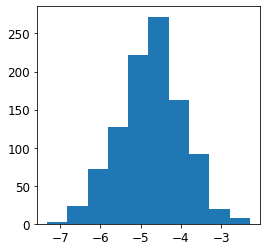

In [6]:
#random sampling for Halpha

#y = 1.-normsp_Ha[(wv_Ha>6535.) & (wv_Ha<6600.)]
#x = wv_Ha[(wv_Ha>6535.) & (wv_Ha<6600.)]
y = 1.-normsp_Ha[(wv_Ha>6555.) & (wv_Ha<6575.)]
x = wv_Ha[(wv_Ha>6555.) & (wv_Ha<6575.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print( 'mean wavelength = %(m).3f' % \
            {'m': np.mean(x_s)})
        print( 'std wavelength = %(m).3f' % \
            {'m': np.std(x_s)})
        print( 'shift Delta lambda/lambda = %(m).8f' %\
            {'m': (np.mean(x_s)-Ha_0)/Ha_0})
        print( 'velocity = %(m).3f km/s' %\
            {'m': (np.mean(x_s)-Ha_0)/Ha_0*300000.0})
        print( 'std line width = %(m).3f km/s\n' %\
            {'m': (np.std(x_s))/Ha_0*300000.0})
    vlos_mc[m] = (np.mean(x_s)-Ha_0)/Ha_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
fig.show()
print( '\nmean vel = %(m).3f+/-%(d).3f' %\
    {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)})
vlos_mc_Ha = vlos_mc

mean wavelength = 4341.518
std wavelength = 5.847
shift Delta lambda/lambda = -0.00003958
velocity = -11.873 km/s
std line width = 404.026 km/s

mean wavelength = 4341.612
std wavelength = 5.850
shift Delta lambda/lambda = -0.00001789
velocity = -5.366 km/s
std line width = 404.236 km/s

mean wavelength = 4341.514
std wavelength = 5.831
shift Delta lambda/lambda = -0.00004044
velocity = -12.132 km/s
std line width = 402.900 km/s


mean vel = -10.156+/-2.476


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


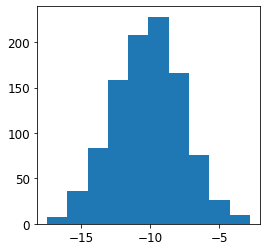

In [15]:
#random sampling for Hgamma

y = 1.-normsp_Hg[(wv_Hg<4370.) &(wv_Hg>4320.)]
x = wv_Hg[(wv_Hg<4370.) &(wv_Hg>4320.)]
#y = 1.-normsp_Hg[(wv_Hg<4351.) &(wv_Hg>4331.)]
#x = wv_Hg[(wv_Hg<4351.) &(wv_Hg>4331.)]
N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print( 'mean wavelength = %(m).3f' %\
            {'m': np.mean(x_s)})
        print( 'std wavelength = %(m).3f' %\
            {'m': np.std(x_s)})
        print( 'shift Delta lambda/lambda = %(m).8f' %\
            {'m': (np.mean(x_s)-Hg_0)/Hg_0})
        print( 'velocity = %(m).3f km/s' %\
            {'m': (np.mean(x_s)-Hg_0)/Hg_0*300000.0})
        print( 'std line width = %(m).3f km/s\n' %\
            {'m': (np.std(x_s))/Hg_0*300000.0})
    vlos_mc[m] = (np.mean(x_s)-Hg_0)/Hg_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
fig.show()
print( '\nmean vel = %(m).3f+/-%(d).3f' %\
    {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)})
vlos_mc_Hg = vlos_mc

mean wavelength = 4102.718
std wavelength = 4.307
shift Delta lambda/lambda = -0.00004198
velocity = -12.594 km/s
std line width = 314.943 km/s

mean wavelength = 4102.736
std wavelength = 4.297
shift Delta lambda/lambda = -0.00003766
velocity = -11.297 km/s
std line width = 314.174 km/s

mean wavelength = 4102.731
std wavelength = 4.303
shift Delta lambda/lambda = -0.00003882
velocity = -11.646 km/s
std line width = 314.656 km/s


mean vel = -12.970+/-1.912


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


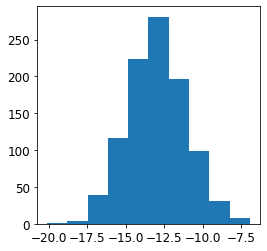

In [16]:
#random sampling for Hdelta

y = 1.-normsp_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
x = wv_Hd[(wv_Hd<4119.) & (wv_Hd>4080.)]
#y = 1.-normsp_Hd[(wv_Hd<4112.) & (wv_Hd>4092.)]
#x = wv_Hd[(wv_Hd<4112.) & (wv_Hd>4092.)]

N = 100000

M = 1000
vlos_mc = np.zeros((M,1))
for m in range(M):
    x_s0 = np.random.uniform(x[0],x[-1],N) 
    y_s0 = np.random.uniform(0.0,np.max(y),N)
    y_x = np.interp(x_s0,x,y)
    ind_acc = (y_s0<=y_x)

    x_s = x_s0[ind_acc]

    if m<3:
        print( 'mean wavelength = %(m).3f' %\
            {'m': np.mean(x_s)})
        print( 'std wavelength = %(m).3f' %\
            {'m': np.std(x_s)})
        print( 'shift Delta lambda/lambda = %(m).8f' %\
            {'m': (np.mean(x_s)-Hd_0)/Hd_0})
        print( 'velocity = %(m).3f km/s' %\
            {'m': (np.mean(x_s)-Hd_0)/Hd_0*300000.0})
        print( 'std line width = %(m).3f km/s\n' %\
            {'m': (np.std(x_s))/Hd_0*300000.0})
    vlos_mc[m] = (np.mean(x_s)-Hd_0)/Hd_0*300000.0

fig = plt.figure(figsize=[4,4])
ax = fig.add_subplot(111)
ax.hist(vlos_mc,10)
fig.show()
print( '\nmean vel = %(m).3f+/-%(d).3f' % \
    {'m': np.mean(vlos_mc), 'd': np.std(vlos_mc)})
vlos_mc_Hd = vlos_mc

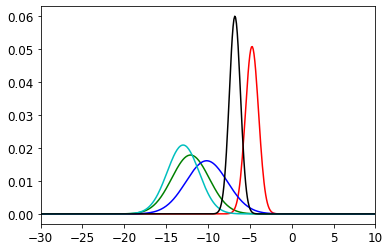

In [19]:
vgrid = np.arange(-200,200,0.1)
vcenter = (vgrid[1:]+vgrid[0:-1])/2.

p_beta = stats.norm(np.mean(vlos_mc_Hb),np.std(vlos_mc_Hb)).pdf(vgrid)   # 其先验视作无信息先验
p_alpha = stats.norm(np.mean(vlos_mc_Ha),np.std(vlos_mc_Ha)).pdf(vgrid)  # 视p(beta)为其先验
p_gamma = stats.norm(np.mean(vlos_mc_Hg),np.std(vlos_mc_Hg)).pdf(vgrid)  # 视考虑先验后的p(alpha)为其先验
p_delta = stats.norm(np.mean(vlos_mc_Hd),np.std(vlos_mc_Hd)).pdf(vgrid)  # 视考虑先验后的p(beta)为其先验
p_post = p_alpha*p_beta*p_gamma*p_delta   # 最终相当于四个分布乘起来

plt.plot(vgrid,p_beta/np.sum(p_beta),'g-')
plt.plot(vgrid,p_alpha/np.sum(p_alpha),'r-')
plt.plot(vgrid,p_gamma/np.sum(p_gamma),'b-')
plt.plot(vgrid,p_delta/np.sum(p_delta),'c-')
plt.plot(vgrid,p_post/np.sum(p_post),'k-')
plt.xlim([-30,10])
plt.show()

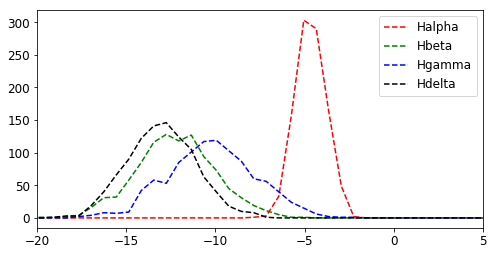

In [23]:
vgrid = np.arange(-200,200,0.7)
vcenter = (vgrid[1:]+vgrid[0:-1])/2.
h_Ha,xedge = np.histogram(vlos_mc_Ha, vgrid)
h_Hb,xedge = np.histogram(vlos_mc_Hb, vgrid)
h_Hg,xedge = np.histogram(vlos_mc_Hg, vgrid)
h_Hd,xedge = np.histogram(vlos_mc_Hd, vgrid)


fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)
pa, = ax.plot(vcenter,h_Ha,'r--',label='Halpha')
pb, = ax.plot(vcenter,h_Hb,'g--',label='Hbeta')
pg, = ax.plot(vcenter,h_Hg,'b--',label='Hgamma')
pd, = ax.plot(vcenter,h_Hd,'k--',label='Hdelta')
ax.legend([pa,pb,pg,pd],\
        ['Halpha','Hbeta','Hgamma','Hdelta'],\
        fontsize=12)
ax.set_xlim((-20,5))
fig.show()

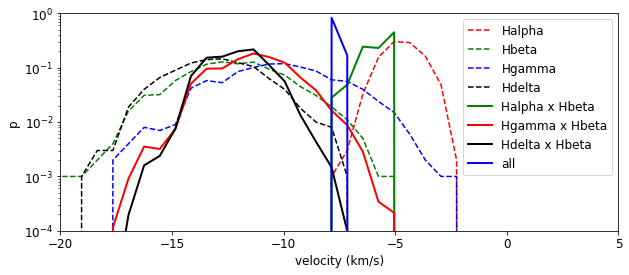

In [30]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_subplot(111)
pa, = ax.plot(vcenter,\
    h_Ha/np.float(np.sum(h_Ha)),'r--',label='Halpha')
pb, = ax.plot(vcenter,\
    h_Hb/np.float(np.sum(h_Hb)),'g--',label='Hbeta')
pg, = ax.plot(vcenter,\
    h_Hg/np.float(np.sum(h_Hg)),'b--',label='Hgamma')
pd, = ax.plot(vcenter,\
    h_Hd/np.float(np.sum(h_Hd)),'k--',label='Hdelta')
#p(a|b)=p_a*p_b
ab, = ax.plot(vcenter, \
    h_Ha*h_Hb/np.float(np.sum(h_Hb*h_Ha)),\
    'g-',linewidth=2)
#p(g|b)=p_g*p_b
gb, = ax.plot(vcenter, \
    h_Hg*h_Hb/np.float(np.sum(h_Hb*h_Hg)),\
    'r-',linewidth=2)
#p(d|b)=p_d*p_b
db, = ax.plot(vcenter, \
    h_Hd*h_Hg*h_Hb/np.float(np.sum(h_Hb*h_Hg*h_Hd)),\
    'k-',linewidth=2)
#p(a|b,g,d)=(p_a*p_b*p_g*p_d)
abgd, = ax.plot(vcenter, \
    h_Ha*h_Hd*h_Hg*h_Hb/np.float(\
    np.sum(h_Hb*h_Hg*h_Hd*h_Ha)),'b-',linewidth=2)
ax.legend([pa,pb,pg,pd, ab, gb, db, abgd],\
    ['Halpha','Hbeta','Hgamma','Hdelta','Halpha x Hbeta','Hgamma x Hbeta',\
     'Hdelta x Hbeta','all'],fontsize=12)
ax.set_xlim((-20,5))
ax.set_yscale('log')
ax.set_ylim([1e-4,1])
ax.set_xlabel('velocity (km/s)',fontsize=12)
ax.set_ylabel('p',fontsize=12)
fig.show()